In [2]:
import numpy as np
import plumed
import mdtraj as mdj
import matplotlib.pyplot as plt


In [3]:
%%bash
# compute free energy as a function of simulation time
# plumed sum_hills --hills ../001_RMSDBound/HILLS   --kt 2.49 --mintozero --outfile rmsdbound.dat is not working here 
# plumed sum_hills --hills HILLS  --mintozero --bin 50 --min 0 --max 1.5

/tmp/ipykernel_11927/1870693525.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas("../001_RMSDBound/fes.dat")
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


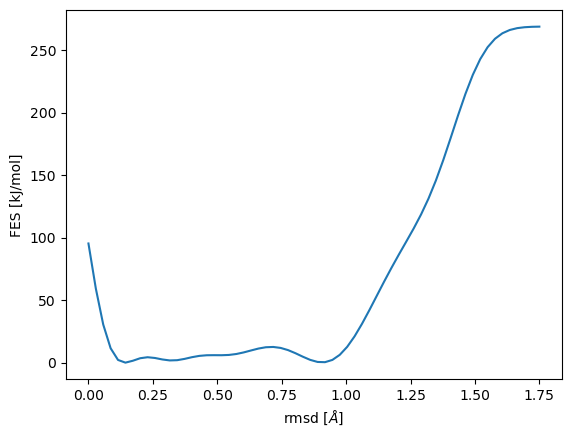

In [7]:
data = plumed.read_as_pandas("../001_RMSDBound/fes.dat")
#plot fes
plt.plot(data["rmsd"]*10,data["file.free"])
# labels
plt.xlabel(r"rmsd [$\AA$]")
plt.ylabel("FES [kJ/mol]")
plt.savefig('figures/rmsdbound_fes.png')

In [8]:
#fes plot of lp 
colvar = plumed.read_as_pandas('../COLVAR')
hills = plumed.read_as_pandas('../HILLS')
hills['d1'] = colvar['fps.lp']
#hills = hills.rename(columns={'d1':'fp'})
file_path = open('../HILLS_LP', 'w')
plumed.write_pandas(hills, file_path)
# plumed.
# data = plumed.read_as_pandas("fes.dat")
# #plot fes
# plt.plot(data["d1"],data["file.free"])
# # labels
# plt.xlabel("d1 [nm]")
# plt.ylabel("FES [kJ/mol]")
# plt.savefig('fes_40ns.png')

/tmp/ipykernel_24170/1246537660.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas('../COLVAR')
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


FileNotFoundError: [Errno 2] No such file or directory: '../COLVAR'

In [18]:
%%bash
# compute free energy as a function of simulation time
plumed sum_hills --hills ../HILLS_LP  --mintozero --outfile fes_lp.dat

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.1 (git: Unknown) compiled on Oct 29 2022 at 19:37:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/nz/projects/FunnelMetadynamics/packages/plumed2-2.8.1/
PLUMED: For installed feature, see /home/nz/projects/FunnelMetadynamics/packages/plumed2-2.8.1//src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/nz/projects/FunnelMetadynamics/packages/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


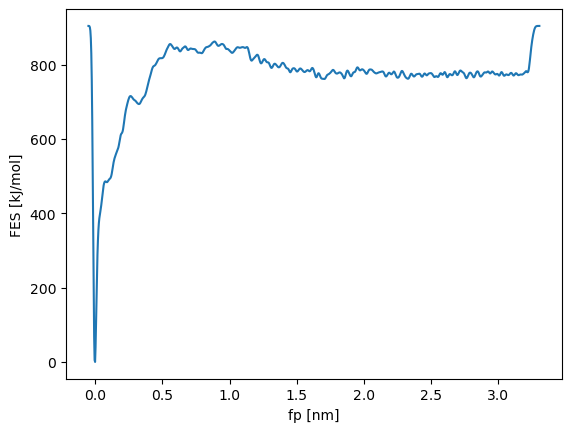

In [20]:
data = plumed.read_as_pandas("fes_lp.dat")
#plot fes
plt.plot(data["d1"],data["file.free"])
# labels
plt.xlabel("fp [nm]")
plt.ylabel("FES [kJ/mol]")
plt.savefig('fes_lp_40ns.png')